<a href="https://colab.research.google.com/github/Leonardodaladno1996/-Search-for-similar-images/blob/main/Similar_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Подключение к гугл-диску
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [15]:
import cv2


image = cv2.imread('/content/gdrive/MyDrive/dataset/0056.png')
print(image.shape)

(256, 256, 3)


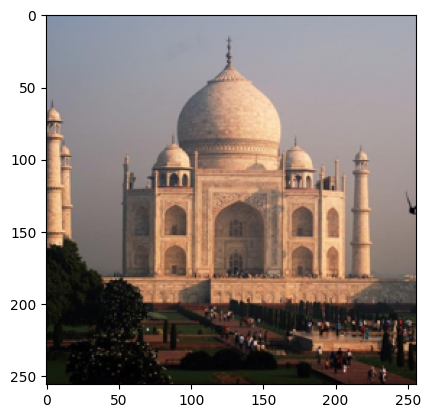

In [18]:
import matplotlib.pyplot as plt

# Отображение изображения
plt.imshow(image[:, :, ::-1])
plt.show()

In [7]:
import keras

# Импорт сверточной основы модуля Xception (без полносвязных слоев), обученной на наборе ImageNet
xception = keras.applications.xception.Xception(include_top=False, weights="imagenet", input_shape=(256, 256, 3))
xception.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 127, 127, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 127, 127, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 127, 127, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 125, 125, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 125, 125, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 125, 125, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 125, 125, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 125, 125, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 125, 125, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 125, 125, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 125, 125, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 63, 63, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 63, 63, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [8]:
import numpy as np

# Получение карты активаций последнего сверточного слоя Xсeption для загруженного изображения
image_scaled = keras.applications.xception.preprocess_input(image)
image_scaled = np.expand_dims(image_scaled, axis=0)
image_xception_prediction = xception.predict(np.array(image_scaled))

print(image_xception_prediction.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
(1, 8, 8, 2048)


In [9]:
image_xception_prediction = image_xception_prediction.flatten()
print(image_xception_prediction.shape)

(131072,)


In [10]:
#Большинство значений карт активаций - нулевые, что говорит о кодирование сложных паттернов изображения на последнем сверточном слое
np.bincount(np.where(image_xception_prediction != 0, 0, 1))

array([39554, 91518])

In [11]:

def activations_filters(prediction):
    '''
    Функция получения массива суммарных активаций для каждого канала
    prediction - карта активаций последнго сверточного слоя Xception размера (1, 8, 8, 2048), где 2048 - количество каналов
    return - для массив суммарных активаций каждого канала
    '''
    activations = np.zeros(shape=(2048,))
    for i in range(2048):
      activations[i] = np.sum(prediction[:, :, :, i])

    return np.round(activations, 2)

In [ ]:
filters = []


# Получение вектора суммарных активаций каждого канала, для всех изображений в датасете
for i in range(9605):
    current_image = cv2.imread(f'/content/gdrive/MyDrive/dataset/{str(i).rjust(4, "0")}.png')
    current_image_preprocessed = keras.applications.xception.preprocess_input(current_image)
    current_prediction = xception.predict(np.expand_dims(current_image_preprocessed, axis=0))
    if i % 100 == 0:
        print(f"number_of_iteration:{i}")
    current_filters = activations_filters(current_prediction)
    filters.append(current_filters)

array_filters = np.array(filters)

print(array_filters.shape)
print(array_filters[0])

In [ ]:
#Запись полученного массива в файл
with open('/content/gdrive/MyDrive/filters_file.txt', "w") as file:

    for image_number in array_filters:
        for filter_value in image_number:
            file.write(str(filter_value) + " ")
        file.write("\n")





In [12]:
#Чтение значений суммарных активаций для каждого изображения из файла
with open (r'/content/gdrive/MyDrive/filters_file.txt', "r") as file:
    lines = file.readlines()
    print(len(lines))

array_filters = np.zeros(shape=(9605, 2048))

for i in range(len(lines)):
    line_elements = lines[i].strip().split(" ")
    for j in range(len(line_elements)):
        array_filters[i, j] = float(line_elements[j])

print(array_filters[:1, :10])
print(array_filters.shape)

9605
[[ 5.38  3.18 15.4   0.58  0.74  4.59  0.87  7.1  20.42  2.45]]
(9605, 2048)


In [13]:
from sklearn.metrics.pairwise import cosine_distances

# Получение матрицы косинусной близости для вектора суммарных активаций для всех изображений
distances = cosine_distances(array_filters)
print(distances.shape)

(9605, 9605)


[  56 9103 8404 1499 3500 8093 1874   65 2761 2755]


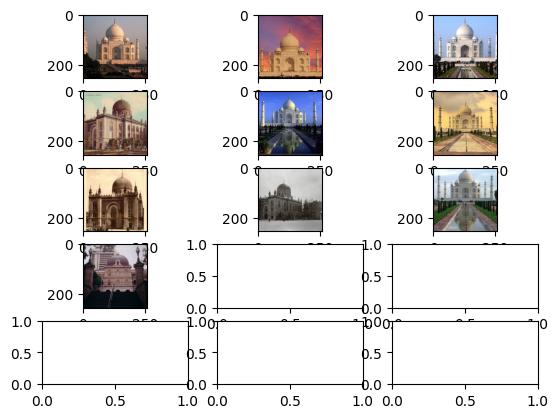

In [19]:
def find_nearest_images(i, distances, k=10, flag=False):
    '''
    Функция поиска похожих изображений
    i - номер изображения в датасете
    distances - вычисленная матрица попарных расстояний
    k - количество самых похожик изображений
    flag - булево значение, отрисовывать ли полученные изображения
    '''

    image_distances = distances[i]
    indexes = np.argsort(image_distances)[:k]

    if flag:
        total_images = len(indexes)

        fig, axes = plt.subplots(k // 3 + 2, 3)


        for i in range(k):
            image = cv2.imread(f'/content/gdrive/MyDrive/dataset/{str(indexes[i]).rjust(4, "0")}.png')
            # Меняем каналы для правильной отрисовки
            image_reversed = image[:, :, ::-1]
            axes[i // 3, i % 3].imshow(image_reversed)

    return indexes

print(find_nearest_images(56, distances, flag=True))

[  56 9103 8404 1499 3500 8093 1874   65 2761 2755]
[  56 9103 8404 1499 8093   65 3500 1874 2761 2755]


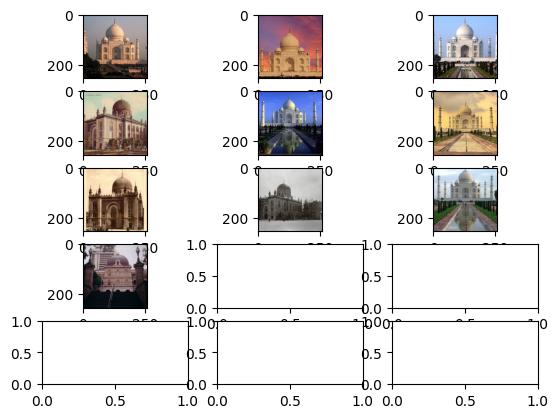

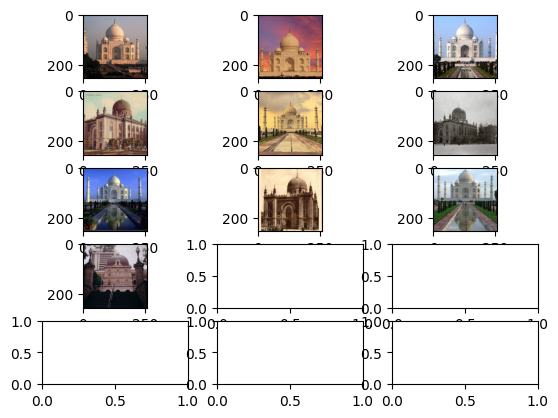

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def get_reduced_data(explained_variance=0.95):
    '''
    Функция понижения размерности векторов суммарных активаций с помощью PCA
    explained_variance - доля необходимой объясненной дисперсии
    return - функция возаращает полученное число компонент и новую матрицу попарных расстояний
    '''

    scaler = StandardScaler()
    array_filters_scaled = scaler.fit_transform(array_filters)

    pca = PCA(n_components=explained_variance)
    array_filters_reduced = pca.fit_transform(array_filters_scaled)

    distances_reduced = cosine_distances(array_filters_reduced)

    return pca.n_components_, distances_reduced

n_components, distances_reduced = get_reduced_data(0.95)


#Сравниваем результаты
print(find_nearest_images(56, distances=distances, k=10, flag=True))
print(find_nearest_images(56, distances=distances_reduced, k=10, flag=True))

In [25]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

#Наивная кластеризация изображений
agg_clstr = AgglomerativeClustering(n_clusters = 983, metric="precomputed", linkage="complete")
agg_clstr.fit(distances_reduced)

print(agg_clstr.labels_[:10], type(agg_clstr.labels_))
print(silhouette_score(distances_reduced, agg_clstr.labels_))

[381  52 315 259 369 664 700 163 769  53] <class 'numpy.ndarray'>
0.054094141834915135


(256, 256, 3)
(1, 8, 8, 2048)
[25.55411911 60.47425079 86.22381592 18.67317963  0.29370862  0.29658884
  0.         28.65987396 14.12192822  3.0097518 ]


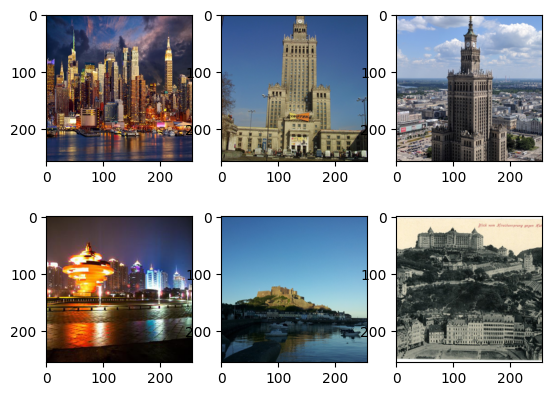

In [28]:
import warnings
warnings.filterwarnings('ignore')

#Загрузка нового изображения из другого датасета
image = cv2.imread('/content/gdrive/MyDrive/нью_йорк.jpg')
image = cv2.resize(image, (256, 256))
image_reversed = image[:, :, ::-1]
print(image.shape)

image_preprocessed = keras.applications.xception.preprocess_input(image)

xception = keras.applications.xception.Xception(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
image_filters = xception(np.expand_dims(image_preprocessed, axis=0))

print(image_filters.shape)

image_activations = np.zeros(shape=(2048,))
for i in range(2048):
    image_activations[i] = np.sum(image_filters[:, :, :, i])

print(image_activations[:10])

image_distances = np.zeros(shape=(9605,))


for i in range(9605):

    image_distances[i] = cosine_distances(image_activations.reshape(-1, 2048), array_filters[i].reshape(-1, 2048))[0]


indexes = np.argsort(image_distances)[:5]

fig, ax = plt.subplots(2, 3)
ax[0][0].imshow(image_reversed)

# Отображение похожих изображений
for i in range(0, 5):
    image_to_show = cv2.imread(f'/content/gdrive/MyDrive/dataset/{str(indexes[i]).rjust(4, "0")}.png')
    image_reversed = image_to_show[:, :, ::-1]
    ax[(i+1) // 3, (i+1)% 3].imshow(image_reversed)